In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EGEG1212/Deep-Learning/blob/main/1.Basic/02_CPU_vs_GPU.ipynb)

SyntaxError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 데이터 불러오기/reshape_scaler/원핫인코딩분류to_categorical
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape
#결과값 60000,28,28,1 흑백이라1

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# 컨볼루션 신경망CNN 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25), #여기까지 2차원처리
    Flatten(),#1차원으로 펼치기
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()
# 결과값 Total params: 1,199,882 네트웍이 120만개정도로 복잡해진것

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

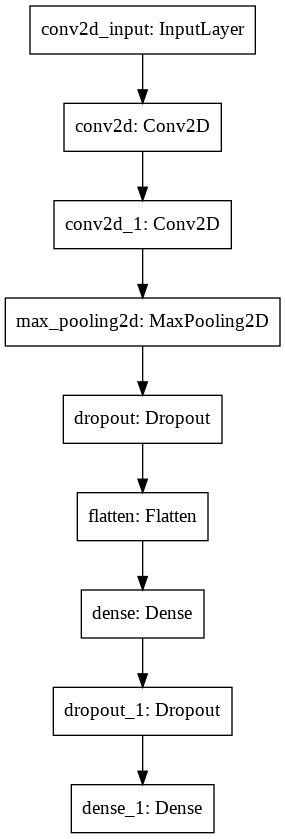

In [ ]:
from tensorflow.keras.utils import plot_model #모델시각화 
plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy', #다중분류categorical_crossentropy/이진분류는 binary
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [ ]:
!ls -l #모델리스트확인

total 32
drwxr-xr-x 2 root root  4096 Feb  8 07:24 model
-rw-r--r-- 1 root root 23744 Feb  8 07:24 model.png
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data


In [ ]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
#콜백함수:checkpointer란 val_loss가 이전것보다 낮으면 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
#콜백함수:early_stopping_callback란 val_loss가 더이상 낮아지지 않으면 epoch를 마친다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                    batch_size=200,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
240/240 [==============================] - 10s 14ms/step - loss: 0.6063 - accuracy: 0.8103 - val_loss: 0.0728 - val_accuracy: 0.9792

Epoch 00001: val_loss improved from inf to 0.07278, saving model to ./model/mnist-cnn-01-0.0728.hdf5
Epoch 2/30
240/240 [==============================] - 3s 12ms/step - loss: 0.1039 - accuracy: 0.9693 - val_loss: 0.0542 - val_accuracy: 0.9841

Epoch 00002: val_loss improved from 0.07278 to 0.05419, saving model to ./model/mnist-cnn-02-0.0542.hdf5
Epoch 3/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0668 - accuracy: 0.9802 - val_loss: 0.0453 - val_accuracy: 0.9868

Epoch 00003: val_loss improved from 0.05419 to 0.04529, saving model to ./model/mnist-cnn-03-0.0453.hdf5
Epoch 4/30
240/240 [==============================] - 3s 12ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0413 - val_accuracy: 0.9882

Epoch 00004: val_loss improved from 0.04529 to 0.04127, saving model to ./model/mnist-cnn-04-0.0413.hdf5
Epoch 5

In [ ]:
!ls model #model파일목록을보여줘 val_loss 제일낮은게 좋은모델

mnist-cnn-01-0.0728.hdf5  mnist-cnn-03-0.0453.hdf5  mnist-cnn-05-0.0389.hdf5
mnist-cnn-02-0.0542.hdf5  mnist-cnn-04-0.0413.hdf5  mnist-cnn-07-0.0361.hdf5


In [ ]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-07-0.0361.hdf5') #제일낮은 좋은모델을 불러다가

In [ ]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Test Accuracy:{acc:.4f}"
) #0.9897

Test Accuracy:0.9897


In [ ]:
# 시각화
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

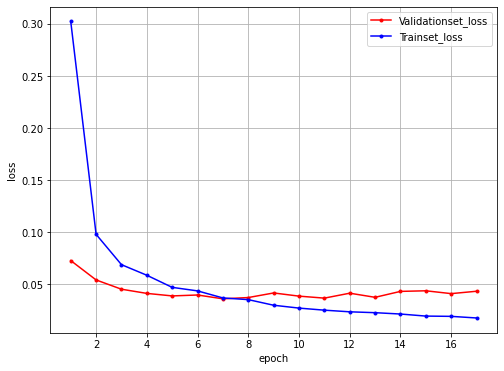

In [ ]:
# 그래프로 표현 
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# validationset에 대하여 어느정도 loss줄어들면 더이상 줄어들지 않는다

### GPU

In [ ]:
#GPU썼는지 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2321252287204213941
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7296790048
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12019067354455608827
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [ ]:
!nvidia-smi

Mon Feb  8 07:27:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    24W /  75W |    909MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------